<a href="https://colab.research.google.com/github/NahuelCostaCortez/taller-IA/blob/main/4_HuggingFaceImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🤗 HUGGINGFACE PARA TAREAS DE IMAGEN**

Al igual que con texto podemos utilizar la herramienta [***pipeline***](https://huggingface.co/docs/transformers/main_classes/pipelines) para acceder a las diferentes tareas de forma sencilla.

## Instalar la librería transformers e importar pipeline

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.8 MB/s eta 0:00:00


In [1]:
from transformers import pipeline

## Tareas

**Estimación de profundidad**

In [7]:
estimator = pipeline("depth-estimation")
url_image = "https://media.npr.org/assets/img/2011/11/07/istock_000002860901small-0e58429bef7fa7d052df8dfefedff1f78f3d3fa2-s1100-c50.jpg"
result = estimator(url_image)
result

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


{'predicted_depth': tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [17.1089, 17.2130, 17.2382,  ..., 16.1662, 14.5362, 14.4886],
          [17.5788, 17.4328, 17.4866,  ..., 17.2977, 15.7959, 15.3315],
          [17.8700, 17.8054, 17.7443,  ..., 18.1546, 17.3377, 16.5887]]]),
 'depth': <PIL.Image.Image image mode=L size=784x588 at 0x7FF06ACDBFA0>}

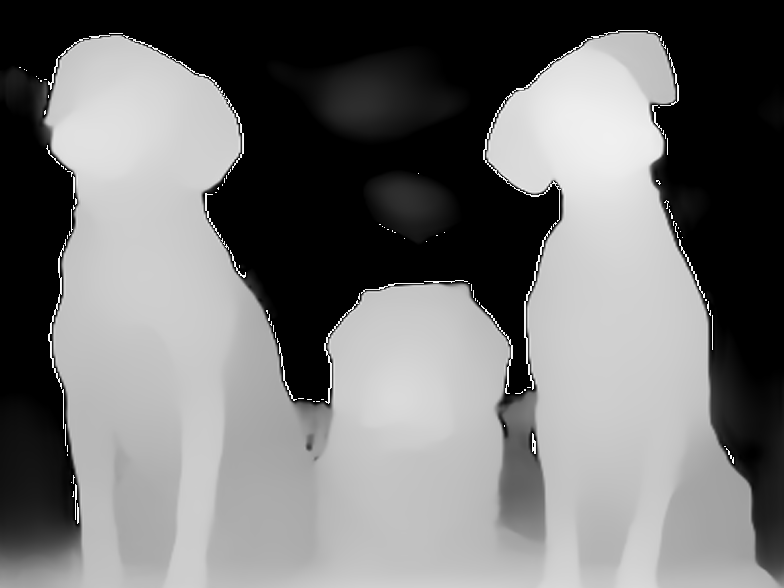

In [8]:
result["depth"]

**Clasificación de imágenes**

In [10]:
clf = pipeline("image-classification")
url_image = "https://t3.ftcdn.net/jpg/05/61/58/40/360_F_561584052_LQoH3rEzxLOSxgowbLOtmL24eEbZGS7B.jpg"
clf(url_image)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.8370370864868164, 'label': 'beaver'},
 {'score': 0.047016166150569916, 'label': 'marmot'},
 {'score': 0.008208050392568111, 'label': 'mink'},
 {'score': 0.006865362171083689, 'label': 'hamster'},
 {'score': 0.005837352946400642, 'label': 'guinea pig, Cavia cobaya'}]

**Detección de objetos**


In [19]:
# Es necesario instalar la librería timm y reiniciar el entorno de ejecución para que funcione
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
model = pipeline("object-detection")
url_image = "https://media.glamourmagazine.co.uk/photos/6152f046a529a9cdeb0a43a9/1:1/pass/BEDROONCHAIRS280921_DEFAULT1.jpg"
model(url_image)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[{'score': 0.9600504636764526,
  'label': 'dining table',
  'box': {'xmin': 1383, 'ymin': 944, 'xmax': 1919, 'ymax': 1628}},
 {'score': 0.9927793145179749,
  'label': 'vase',
  'box': {'xmin': 1487, 'ymin': 754, 'xmax': 1599, 'ymax': 1035}},
 {'score': 0.9925987720489502,
  'label': 'chair',
  'box': {'xmin': 277, 'ymin': 327, 'xmax': 1454, 'ymax': 1733}}]

**Segmentación de imágenes**

En este ejemplo se utiliza [Segment Anything Model (SAM)](https://segment-anything.com/), modelo recientemente publicado (5 de abril) por Meta AI



> Nota: el modelo utiliza GPU y requiere mucha memoria, es posible que no funcione en Colab



In [16]:
# instalar la última versión de la librería (si no se hace y se instala con pip install transformers no va a reconocer el modelo)
!pip install -q --upgrade git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import torch
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

[Explorar otros espacios](https://huggingface.co/tasks/image-segmentation)